In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset
!unzip diabetes-health-indicators-dataset.zip
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
 83% 5.00M/6.03M [00:00<00:00, 33.1MB/s]
100% 6.03M/6.03M [00:00<00:00, 39.1MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Data Cleaning

In [3]:
df.isnull().sum()


,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [4]:
df.drop_duplicates(inplace=True)


Exploratory Data Analysis (EDA)

1-Univariate Analysis

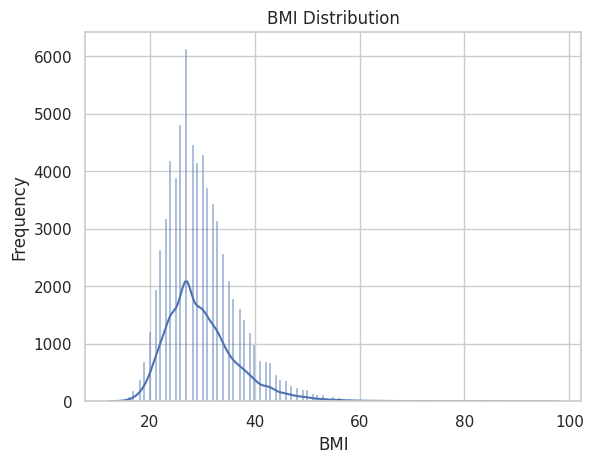

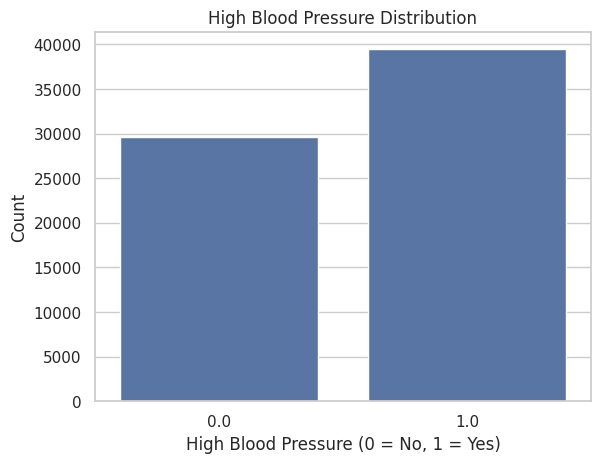

In [5]:
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='HighBP', data=df)
plt.title('High Blood Pressure Distribution')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


2-Bivariate Analysis

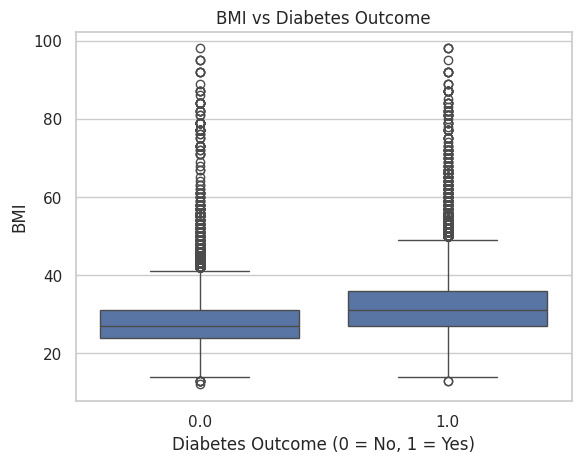

In [6]:
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


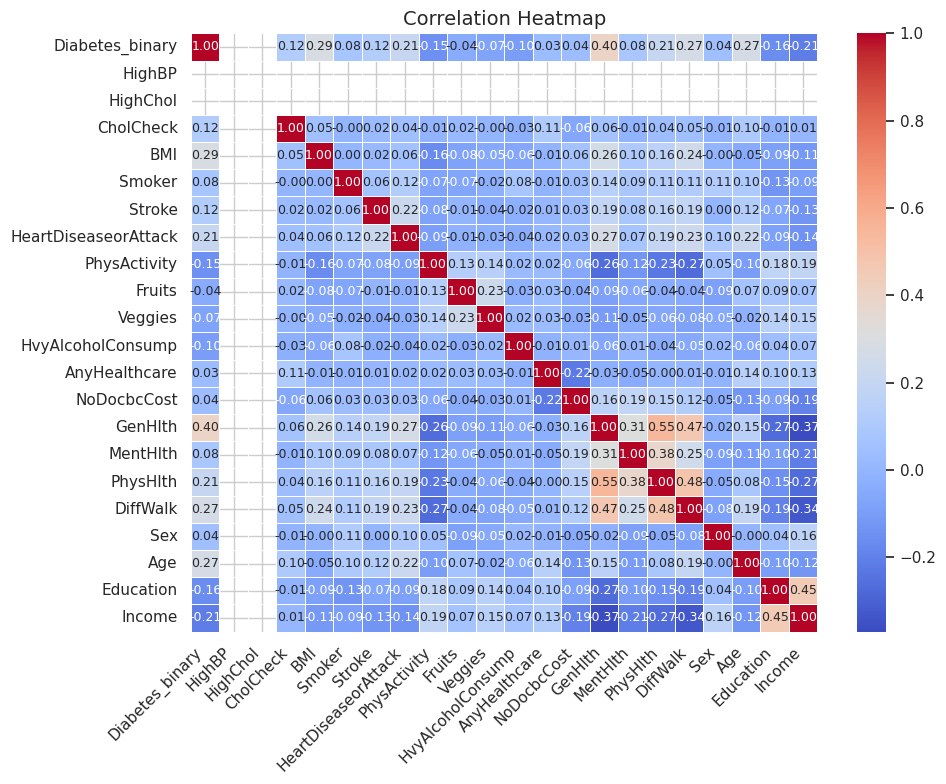

In [27]:

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 9}, linewidths=.5)

plt.title('Correlation Heatmap', size=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')


plt.tight_layout()
plt.show()


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


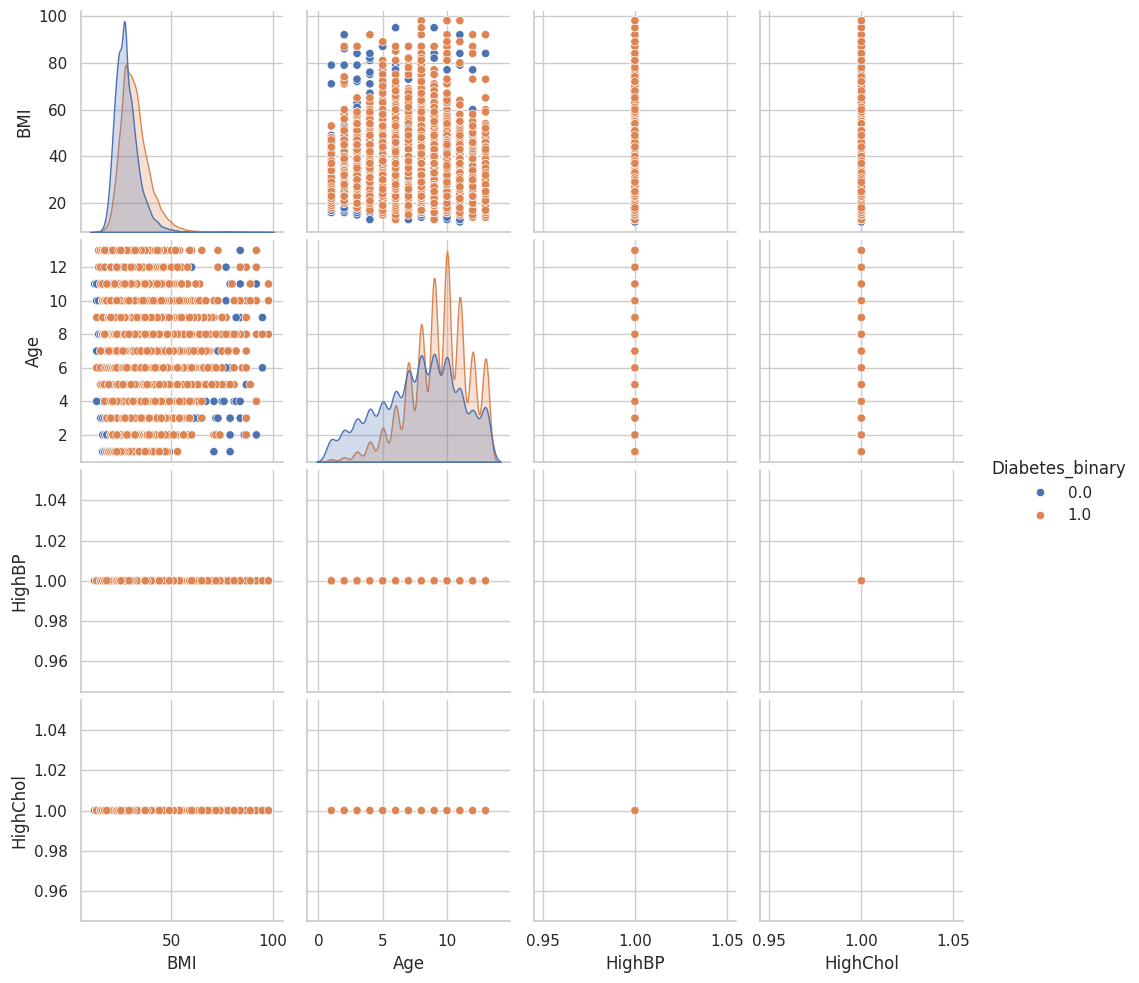

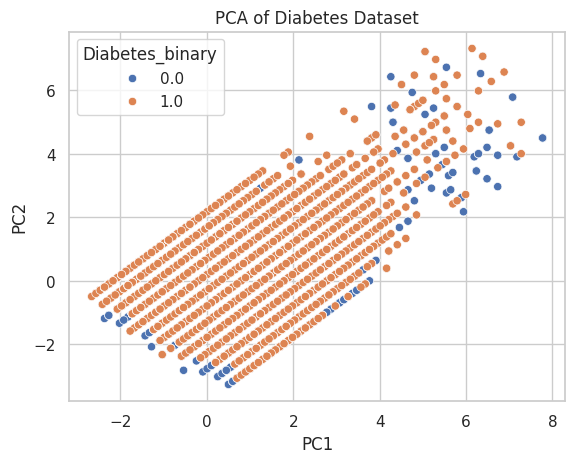

In [21]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print(df.columns)

selected_features = ['BMI', 'Age', 'HighBP', 'HighChol']

df[selected_features] = df[selected_features].replace(0, np.nan)
df[selected_features] = df[selected_features].fillna(df[selected_features].mean())

df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')


sns.pairplot(df[selected_features + ['Diabetes_binary']], hue='Diabetes_binary')
plt.show()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Diabetes_binary'] = df['Diabetes_binary'].values

sns.scatterplot(x='PC1', y='PC2', hue='Diabetes_binary', data=pca_df)
plt.title('PCA of Diabetes Dataset')
plt.show()


4-Statistical Analysis

In [25]:
grouped_stats = df.groupby('Diabetes_binary').agg(['mean', 'median', 'std'])
print(grouped_stats)

                HighBP             HighChol             CholCheck         \
                  mean median  std     mean median  std      mean median   
Diabetes_binary                                                            
0.0                1.0    1.0  0.0      1.0    1.0  0.0  0.955860    1.0   
1.0                1.0    1.0  0.0      1.0    1.0  0.0  0.993133    1.0   

                                 BMI  ...       Sex       Age                  \
                      std       mean  ...       std      mean median      std   
Diabetes_binary                       ...                                       
0.0              0.205409  27.880183  ...  0.495754  7.806272    8.0  3.11898   
1.0              0.082582  31.964242  ...  0.499492  9.375958   10.0  2.33464   

                Education                     Income                   
                     mean median       std      mean median       std  
Diabetes_binary                                                      